# Determinantal Point Process

## Grid example



In the grid example, suppose we have an auditorium with several seats dispoea grid of $n \times n$ seats. We want to use a DPP model to the seats chosen by students attending a talk. We think that students will tend to spread out among the seats.
!["title"](figs/auditorium.jpg)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

### Dummy sampling

A dummy sampling approach consists of sampling an element a subset/element $A = {i}$ with probability $P(A = \{i\})$. After sampling the first element, we recompute the probabilities, but conditioning on the value that was previously sampled. Kulesza et al. presents a better approach based on the eigendecomposition, that we shall see further ahead.

In this sampling problem, we shall consider the same example of sampling a set of points $\{1,2,\dots,n\}$ from a 2D grid. Reintroducing the data:

(-0.2, 1.2)

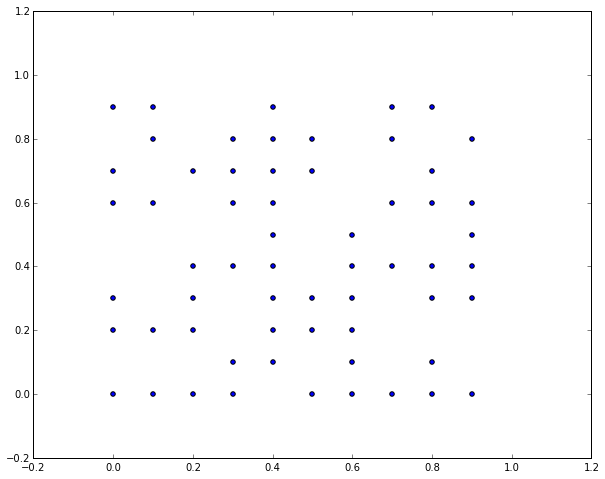

In [13]:
# sampling points
from dpp import DPP

n = 10 # thus, N = n^2. As I'm sampling from a plane, D = 2
sigma = 0.1 
grid_points = np.arange(n) / float(n)

dpp_grid = DPP(grid_points)

sampled_idxs = dpp_grid.dummy_sampling(60)
sampled_points = dpp_grid.idx_to_point[sampled_idxs]
#print sampled_points
plt.scatter(sampled_points[:,0], sampled_points[:,1])
plt.xlim([-0.2, 1.2])
plt.ylim([-0.2, 1.2])

### Efficient sampling

The dummy sampling algorithm aforementioned presents several issues. The main issue is the high computational cost, being infeasible to sample from larger grids, such as a $60 \times 60$ grid. Kulesza et al. describes efficient algorithms for sampling. Here, we implement the first and more simple approach, in which is not possible to select the number of points to be sampled. We test it on a $60 \times 60$ grid.

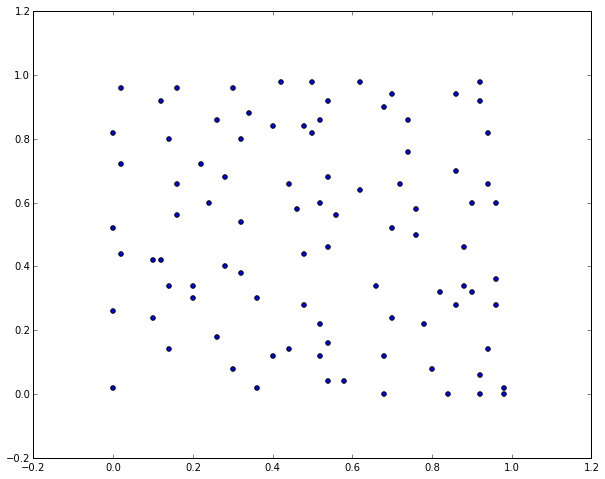

In [5]:
from dpp import DPP

# parameters
n = 60 # thus, N = n^2. As I'm sampling from a plane, D = 2
sigma = 0.1 
grid_points = np.arange(n) / float(n)

dpp_grid = DPP(grid_points)

# sampling points
sampled_idxs = dpp_grid.sample_dpp()
sampled_points = dpp_grid.idx_to_point[sampled_idxs]
# print sampled_points
plt.scatter(sampled_points[:,0], sampled_points[:,1])

### Uniform sampling

The students distribution presents a repulsion between them. But, what would happen if we tried to model such repulsion using an uniform distribution?

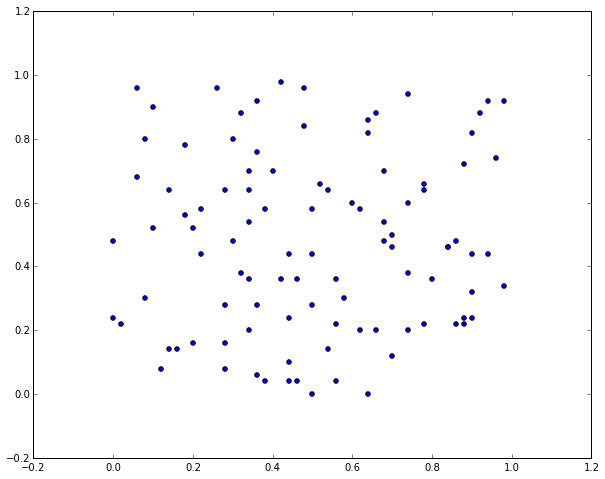

In [12]:
ind_sample = np.random.randint(n*n, size=(100))
# just using the indexing structure
ind_points = dpp_grid.idx_to_point[ind_sample]
plt.scatter(ind_points[:,0], ind_points[:,1])

We see that several points are sampled next to each other, in comparison to points sampled from the DPP distribution.